In [2]:
import pandas as pd
df = pd.read_csv('datasets/heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.shape

(918, 12)

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df['FastingBS'].unique()

array([0, 1])

In [10]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [11]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [12]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [13]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [14]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [15]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [16]:
import matplotlib.pyplot as plt

In [17]:
class_counts = y.value_counts()

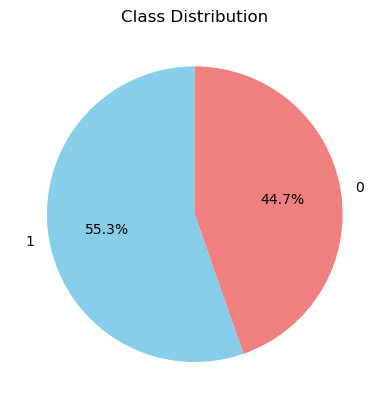

In [18]:
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

For OrdinalEncoder:

1.   Sex
2.   ExerciseAngina
3.   ST_Slope

For OneHotEncoder:


1.   ChestPainType
2.   RestingECG

For StandardScaler:


1.   Age
2.   RestingBP
3.   Cholesterol
4.   MaxHR

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [20]:
to_ode = ['Sex','ST_Slope','ExerciseAngina']
to_ohe = ['ChestPainType','RestingECG']
to_scale = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [21]:
ode = OrdinalEncoder()
ohe = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

In [22]:
ct = make_column_transformer(
    (ode, to_ode),
    (ohe, to_ohe),
    (scaler, to_scale),
    remainder='passthrough'
)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier()

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
pipeline = Pipeline(
    steps = [
        ('ct', ct),
        ('model', model)
    ]
)

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cvs = cross_val_score(pipeline, X, y, cv=10)

In [29]:
cvs

array([0.88043478, 0.93478261, 0.83695652, 0.89130435, 0.85869565,
       0.84782609, 0.89130435, 0.80434783, 0.79120879, 0.78021978])

In [30]:
import numpy as np

In [31]:
np.average(cvs)

np.float64(0.8517080745341616)

In [32]:
np.std(cvs)

np.float64(0.04707182673181379)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [35]:
pipeline.fit(X_train, y_train)

,steps,"[('ct', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ordinalencoder', ...), ('onehotencoder', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
y_pred = pipeline.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
score = classification_report(y_test, y_pred)

In [39]:
print(score)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        77
           1       0.86      0.91      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'model__n_estimators': [500, 1000, 1500],
    'model__max_depth': [10, 20, 30],
    'model__criterion': ['entropy','gini'],
    'model__min_samples_split': [5, 10, 15],
    'model__min_samples_leaf': [1, 2, 4]
}

In [42]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [43]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[CV] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.5s
[CV] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.4s
[CV] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=1000; total time=   0.8s
[CV] END model__criterion=entropy, model__max_depth=10, model__min_sa

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__criterion': ['entropy', 'gini'], 'model__max_depth': [10, 20, ...], 'model__min_samples_leaf': [1, 2, ...], 'model__min_samples_split': [5, 10, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ordinalencoder', ...), ('onehotencoder', ...), ...]"


In [44]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross Validation Score:", grid_search.best_score_)

Best Parameters: {'model__criterion': 'entropy', 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 1500}
Best Cross Validation Score: 0.8869070916037648


In [45]:
best_pipeline = grid_search.best_estimator_

In [46]:
y_pred_best = best_pipeline.predict(X_test)

In [47]:
best_score = classification_report(y_test, y_pred)

In [48]:
print(best_score)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        77
           1       0.86      0.91      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



Prediction Accuracy: 86%

In [49]:
import torch